## Проверка гипотез и проведение анализа А/В - тестирования.

<font face='times new roman' size=4 font color='#5555FF'>**Цель исследования:**</font><br>
Проверка приоритетной гипотезы на результатах проведенного A/B-теста, для выдачи рекомендаций руководителям интернет-магазина по повышению выручки.<br>

**Входные данные** - подготовленные совместно с отделом маркетинга и собранные в датафрейм гипотезы для увеличения выручки бизнеса, а также информация о результатах А/В-теста, собранная в отдельные датафреймы заказов и посетителей.<br>

<font face='times new roman' size=4 font color='#5555FF'>**Описание:**</font><br>
1. Загрузка входных данных и выбор приоритетной гипотезы.
2. Предобработка данных и их подготовка для проведения исследования.
3. Исследовательский анализ.
4. Выводы и рекомендации.

Исследование поможет проверить приоритетную гипотезу на имеющихся данных, которое поможет принять правильное решение руководителям интернет-магазина.

## Выбор приоритетной гипотезы.

Запустим необходимые библиотеки и прочитаем имеющиеся файлы.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import datetime as dt

In [4]:
import matplotlib.pyplot as plt

In [5]:
import scipy.stats as st

In [6]:
df_hypot = pd.read_csv('/datasets/hypothesis.csv')

In [7]:
orders = pd.read_csv('/datasets/orders.csv')

In [8]:
visitors =  pd.read_csv('/datasets/visitors.csv')

In [9]:
pd.options.display.max_colwidth = 1

Познакомимся с таблицей гипотез.

In [10]:
df_hypot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [11]:
df_hypot

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<div style="background-color: #CCCCCC;">
    
Прочитали и вывели таблицу с гипотезами. Проблем с данными не обнаружено. Всего 9 гипотез по увеличению выручки интернет-магазина с параметрами *Reach, Impact, Confidence, Effort*.<br>
Применим фреймворк ICE и RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

</div>

In [12]:
# Добавим столбец ice
df_hypot['ice'] = round(df_hypot['Impact'] * df_hypot['Confidence'] / df_hypot['Efforts'], 2)
df_hypot.sort_values(by='ice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


При применении фреймворка ICE тройка лидеров выглядит так: 8, 0 и 7 гипотезы.

In [13]:
# Добавим столбец rice
df_hypot['rice'] = round(df_hypot['Reach'] * df_hypot['Impact'] * df_hypot['Confidence'] / df_hypot['Efforts'], 2)
df_hypot.sort_values(by='rice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


При применении фреймворка RICE тройка лидеров изменилась: 7, 2 и 0 гипотезы. Так произошло потому, что фреймворк RICE учитывает охват пользователей *Reach*, а он самый высокий у седьмой гипотезы.

In [14]:
df_hypot['Hypothesis'][7] # выведем полный текст гипотезы

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

<div style="background-color: #CCCCCC;">
    
Рассмотрели все 9 гипотез по увеличению выручки интернет-магазина.<br>
Применили фреймворки ICE и RICE для приоритизации гипотез. При применении фреймворка ICE тройка лидеров выглядит так: 8, 0 и 7 гипотезы. При применении фреймворка RICE тройка лидеров изменяется на: 7, 2 и 0 гипотезы. Это происходит при учёте охвата пользователей. Седьмая гипотеза, которую предстоит проверить звучит следующим образом: *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*.
</div>

## Предобработка данных

### Общая информация о данных

Напишем функцию для ознакомления с датафреймами.

In [15]:
def print_df_info(df):
    display(df.head()) # первые строки
    print('\nОбщая информация:')
    print(df.info(), end='\n\n') # общая информация 
    print('Количество уникальных значений колонок:')
    for col in df.columns: # количество уникальных значений
        print(f'  {col}: {df[col].nunique()}')
    print('')
    print('Количество дубликатов:', df.duplicated().sum()) # количество явных дубликатов

Используем функцию *print_df_info* для непосредственного ознакомления с датафреймами. Ознакомимся с *orders*.

In [16]:
print_df_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Количество уникальных значений колонок:
  transactionId: 1197
  visitorId: 1031
  date: 31
  revenue: 713
  group: 2

Количество дубликатов: 0


<div style="background-color: #CCCCCC;">

Датафрейм *orders* - таблица с заказами в которой 1197 строк, 5 столбцов. Столбцы представляют собой:
- *transactionId* - идентификатор заказа, 1197 заказов. Тип данных int64 - соответствует;
- *visitorId* - идентификатор пользователя, 1031 пользователь, который совершил заказ. Понятно, что некоторые пользователи совершили не по одному заказу.  Тип данных int64 - соответствует;
- *date* - дата, когда был совершён заказ - 31 день. Похоже, что рассматриваем один месяц.  Тип данных object - не соответствует. Далее разбиремся подробнее;
- *revenue* - выручка заказа - 713 различных значенийю Тип данных int64 - соответствует;
- *group* -  группа A/B-теста, в которую попал заказ, в тесте всего 2 группы. Тип данных object - не соответствует.

Явных дубликатов не обнаружено. В целом данные хорошего качества.
</div>

In [17]:
print_df_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Количество уникальных значений колонок:
  date: 31
  group: 2
  visitors: 58

Количество дубликатов: 0


<div style="background-color: #CCCCCC;">

Датафрейм *visitors* - таблица с количеством посетителей на каждый день, в которой 62 строки, 3 столбца. Столбцы представляют собой:
- *date* - дата, 62 значения по 31 дню для каждой группы. Тип данных object - не соответствует;
- *group* - группа A/B-теста, 2 группы - здесь всё понятно. Тип данных object - соответствует.;
- *visitors* - количество пользователей в указанную дату в указанной группе A/B-теста, 58 значений.  Тип данных int64 - соответствует.

Явных дубликатов не обнаружено. В целом данные хорошего качества.
</div>

### Предобработка Orders

Изменим тип данных столбца *date*.

In [18]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'].head()

0   2019-08-15
1   2019-08-15
2   2019-08-15
3   2019-08-15
4   2019-08-15
Name: date, dtype: datetime64[ns]

In [19]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [20]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

Измненив тип данных на datetime64, выяснили период в который проводился тест. С 1 августа 2019 года по 31 августа 2019 года.

In [21]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Группы распределились не равномерно. Группа В - 640 заказов, группа А - 557 заказов.

In [22]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Максимальное значение в 1 294 500 руб. при медиане в 2 978 выглядит аномальным. Посмотрим как выглядит топ-10 значений.

In [23]:
orders['revenue'].sort_values(ascending=False).head(10)

425     1294500
1196    202740 
858     93940  
1136    92550  
744     86620  
682     78990  
662     78990  
743     67990  
1103    66350  
1099    65710  
Name: revenue, dtype: int64

Два значения явно выделяются. Убедимся в этом на графике ящик с усами.

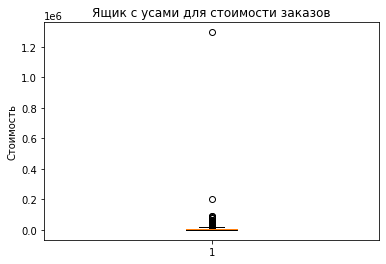

In [24]:
plt.boxplot(orders['revenue'])
plt.title(label='Ящик с усами для стоимости заказов')
plt.ylabel('Стоимость');

In [25]:
df_b = orders.loc[orders['group'] == 'B']
df_a = orders.loc[orders['group'] == 'A']

In [26]:
df_b[df_b['visitorId'].isin(df_a['visitorId'])]['visitorId'].nunique()

58

58 пользователей которые совершили заказы и в группе А и в группе В. Скорее всего это постоянные клиенты компании. Их не стоит удалять.

### Предобработка Visitors

Изменим тип данных столбца *date*.

In [27]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'].head()

0   2019-08-01
1   2019-08-02
2   2019-08-03
3   2019-08-04
4   2019-08-05
Name: date, dtype: datetime64[ns]

In [28]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [29]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

Данные также за период с 1 августа 2019 года по 31 августа 2019 года.

<div style="background-color: #CCCCCC;">

Провели первоначальное знакомство и предобработку исходных данных, так как данные хорошего качества, много времени не потратили.<br>
**Таблица *orders*.**<br>
Всего 1197 заказов. Некоторые пользователи совершали более одного заказа.  Тест проходил в период  с 1 по 31 августа 2019 года, изменили тип данных столбца *date*. В тесте всего 2 группы. Явных дубликатов не обнаружено. Удалили две строки, так как значения столбца *revenue* были аномальны и могли сильно исказить результаты тестирования.<br> 
    
**Таблица *visitors*.**<br>
Данные за каждый день с 1 по 31 августа 2019 года - количество пользователей в указанную дату в указанной группе A/B-теста. Изменили тип данных столбца *date*. Данные также за две группы A/B-теста. Явных дубликатов не обнаружено.                                                                                                                                 
</div>

## Исследовательский анализ

### Подготовка данных

Создадим массив уникальных пар значений дата - группа.

In [30]:
dates_group = orders[['date', 'group']].drop_duplicates().reset_index(drop=True)
dates_group.head()

,date,group
0,2019-08-15,B
1,2019-08-15,A
2,2019-08-16,A
3,2019-08-16,B
4,2019-08-01,A


Создадим кумулятивные данные по таблице с заказами.

In [31]:
orders_agregat = dates_group.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                 .agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}),\
                                 axis = 1).sort_values(by=['date', 'group']).reset_index(drop=True)
orders_agregat.head()

,date,group,transactionId,visitorId,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-01,B,21,20,101217
2,2019-08-02,A,44,38,242401
3,2019-08-02,B,45,43,266748
4,2019-08-03,A,68,62,354874


Создадим кумулятивные данные по таблице с покупателями.

In [32]:
visitors_agregat = dates_group.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                 .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),\
                                 axis = 1).sort_values(by=['date', 'group']).reset_index(drop=True)
visitors_agregat.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,1338
3,2019-08-02,B,1294
4,2019-08-03,A,1845


Объединим получившиеся таблицы.

In [33]:
cumulative_df = orders_agregat.merge(visitors_agregat, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_df.head()

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Теперь можем построить график кумулятивной выручки по группам.

###  График кумулятивной выручки

Построим график кумулятивной выручки по группам и дням.

In [34]:
cumulative_rev_A = cumulative_df[cumulative_df['group'] == 'A'] # группа А 
cumulative_rev_B = cumulative_df[cumulative_df['group'] == 'B'] # группа В

Строим непосредственно графики.

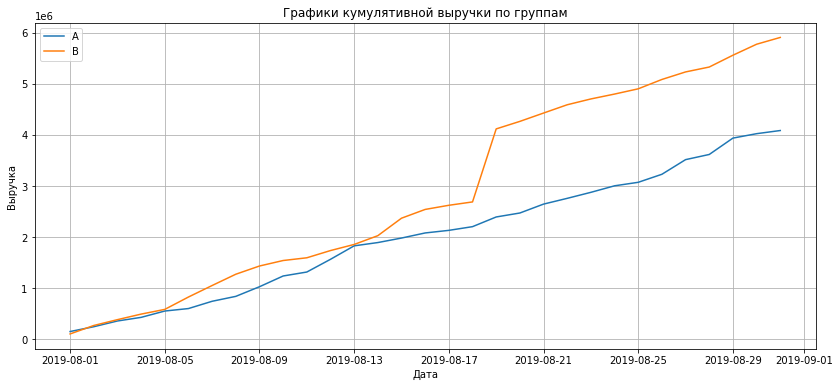

In [35]:
plt.figure(figsize=(14,6))
plt.plot(cumulative_rev_A['date'], cumulative_rev_A['revenue'], label='A')
plt.plot(cumulative_rev_B['date'], cumulative_rev_B['revenue'], label='B')
plt.grid()
plt.title(label='Графики кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend();

<div style="background-color: #CCCCCC;">

В группе А выручка равномерно увеличивается в течении всего времени. В группе В выручка равномерно увеличивалась до середины теста, затем резко выросла и продолжила также равномерно увеличиваться. На лицо влияние аномальных значений.
</div>

###  График кумулятивного среднего чека

Построим график кумулятивного среднего чека по группам.

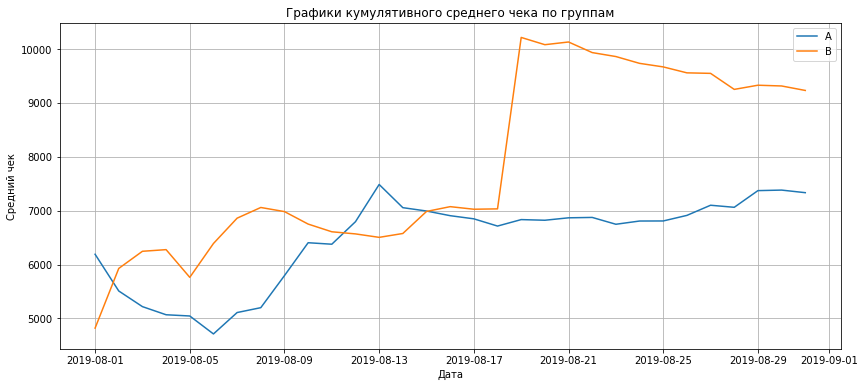

In [36]:
plt.figure(figsize=(14,6))
plt.plot(cumulative_rev_A['date'], cumulative_rev_A['revenue'] / cumulative_rev_A['transactionId'], label='A')
plt.plot(cumulative_rev_B['date'], cumulative_rev_B['revenue'] / cumulative_rev_B['transactionId'], label='B')
plt.grid()
plt.title(label='Графики кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend();

<div style="background-color: #CCCCCC;">

В начале теста средний чек в группе В был значительно выше. К середине теста чеки сравнялись, затем средний чек группы В резко вырос и постепенно снижался к концу теста. Значение среднего чека в группе А с середины теста установилось и менялось незначительно. На графике также видно влияние аномальных значений в группе В.
</div>

###  График относительного изменения кумулятивного среднего чека

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Подготовим данные.

In [37]:
# соединим две таблицы
cumulative_rev_BA= cumulative_rev_A.merge(cumulative_rev_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
cumulative_rev_BA.head()

,date,groupA,transactionIdA,visitorIdA,revenueA,visitorsA,groupB,transactionIdB,visitorIdB,revenueB,visitorsB
0,2019-08-01,A,24,20,148579,719,B,21,20,101217,713
1,2019-08-02,A,44,38,242401,1338,B,45,43,266748,1294
2,2019-08-03,A,68,62,354874,1845,B,61,59,380996,1803
3,2019-08-04,A,84,77,425699,2562,B,78,75,489567,2573
4,2019-08-05,A,109,100,549917,3318,B,101,98,581995,3280


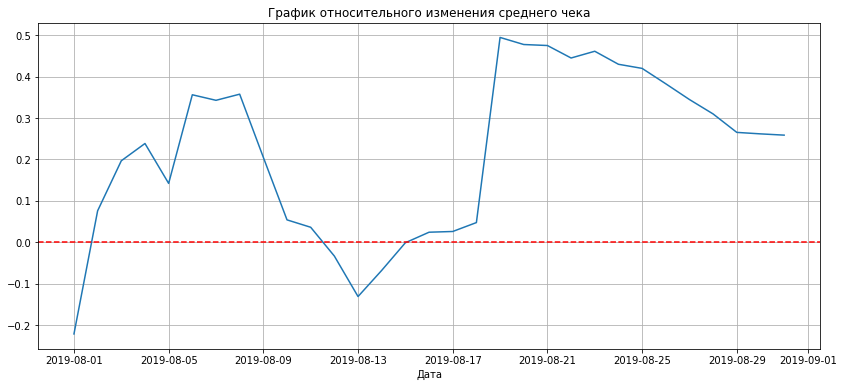

In [38]:
plt.figure(figsize=(14,6))
plt.plot(cumulative_rev_BA['date'], (cumulative_rev_BA['revenueB'] / cumulative_rev_BA['transactionIdB']) / \
         (cumulative_rev_BA['revenueA'] / cumulative_rev_BA['transactionIdA']) - 1)
plt.axhline(y=0, color='red', linestyle='--')
plt.grid()
plt.title(label='График относительного изменения среднего чека')
plt.xlabel('Дата')
plt.show();

<div style="background-color: #CCCCCC;">

График относительного изменения среднего чека подтверждает предыдущий вывод. Группа В в начале теста была лучше группы А, к середине теста средний чек в группах был одинаковый, затем в группе В он значительно вырос.
</div>

###  График кумулятивного среднего количества заказов

Построим график кумулятивного среднего количества заказов на посетителя по группам.

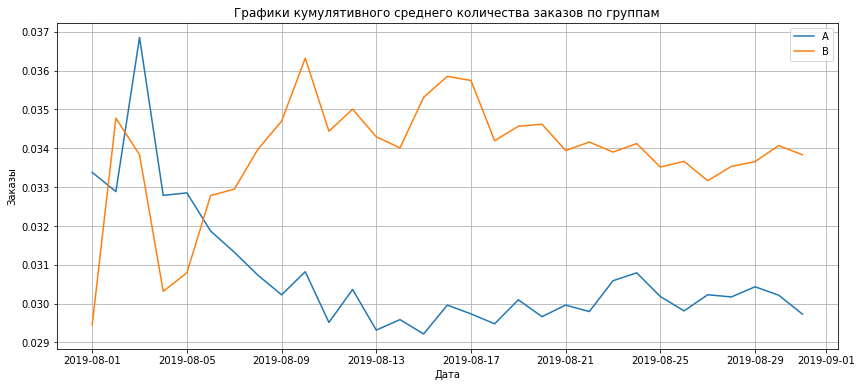

In [39]:
plt.figure(figsize=(14,6))
plt.plot(cumulative_rev_A['date'], cumulative_rev_A['transactionId'] / cumulative_rev_A['visitors'], label='A')
plt.plot(cumulative_rev_B['date'], cumulative_rev_B['transactionId'] / cumulative_rev_B['visitors'], label='B')
plt.grid()
plt.title(label='Графики кумулятивного среднего количества заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.legend();

<div style="background-color: #CCCCCC;">

Значения установились для обоих групп и в группе В стабильно больше заказов.
</div>

###  График относительного изменения кумулятивного среднего количества заказов

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Подготовим данные.

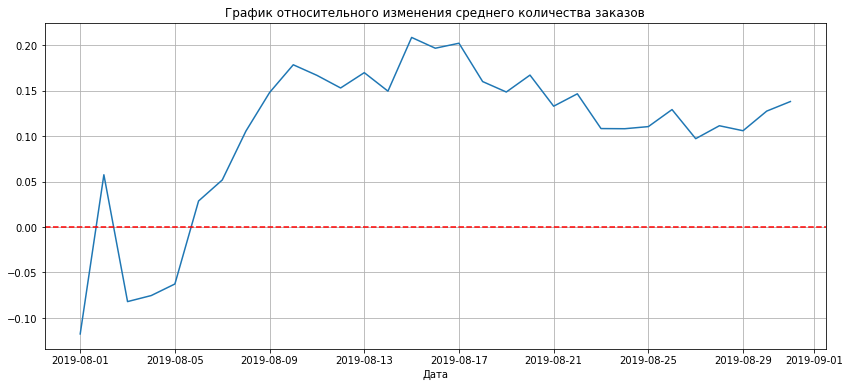

In [40]:
plt.figure(figsize=(14,6))
plt.plot(cumulative_rev_BA['date'], (cumulative_rev_BA['transactionIdB'] / cumulative_rev_BA['visitorsB']) / \
         (cumulative_rev_BA['transactionIdA'] / cumulative_rev_BA['visitorsA']) - 1)
plt.axhline(y=0, color='red', linestyle='--')
plt.grid()
plt.title(label='График относительного изменения среднего количества заказов')
plt.xlabel('Дата')
plt.show();

<div style="background-color: #CCCCCC;">

В начале теста группа В проигрывала группе А по количеству заказов, далее количество заказов в группе В резко выросло, к концу теста стабилизировалось и оставалось стабильно больше, чем в группе А.
</div>

###  Точечный график количества заказов по пользователям

Построим точечный график для наглядности картины по количеству заказов на одного пользователя.

In [41]:
orders['visitorId'].value_counts().head(10)

4256040402    11
2458001652    11
2378935119    9 
2038680547    8 
199603092     5 
237748145     5 
3717692402    5 
3062433592    5 
3803269165    5 
1230306981    5 
Name: visitorId, dtype: int64

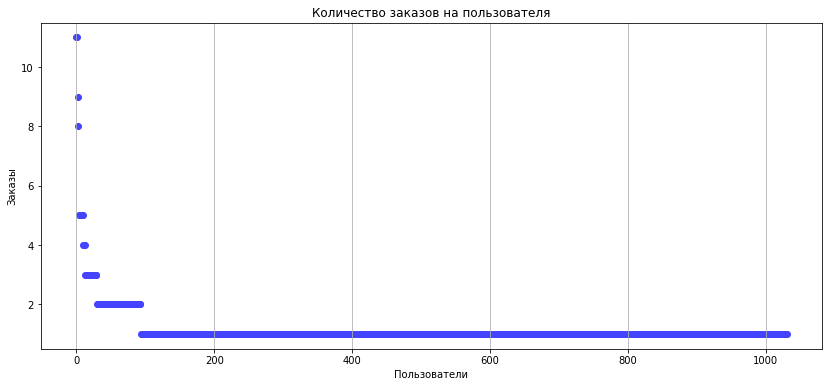

In [42]:
x_value = pd.Series(range(0, len(orders['visitorId'].value_counts()))) # массив для построения графика
plt.figure(figsize=(14,6))
plt.scatter(x_value, orders['visitorId'].value_counts(), color='#4444FF')
plt.grid(axis='x')
plt.title(label='Количество заказов на пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Заказы');

<div style="background-color: #CCCCCC;">

Больше всего пользователей которые совершили 1 заказ, но есть и рекордсмены: 11, 9 и 8 заказов.
</div>

###  Посчет перцентилей количества заказов на пользователя.

In [43]:
np.percentile(orders['visitorId'].value_counts(), [90, 95, 99])

array([1., 2., 4.])

<div style="background-color: #CCCCCC;">

Ровно 1 % пользователей заказывали более 4 раз. Более 4 заказов уже аномальные значения.
</div>

###  Точечный график стоимостей заказов

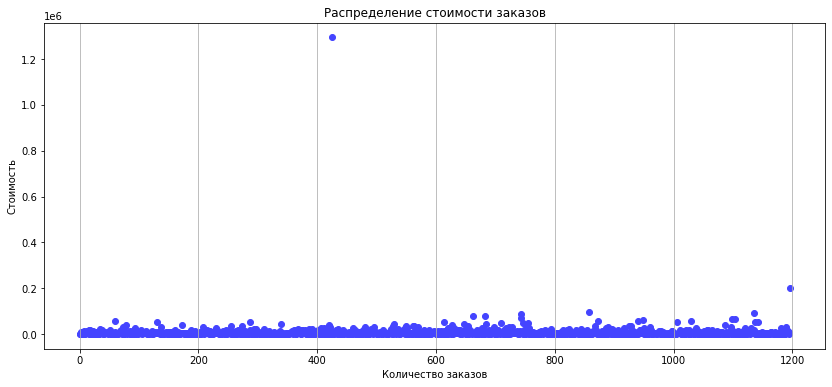

In [44]:
x_value = pd.Series(range(0, len(orders['revenue']))) # массив для построения графика
plt.figure(figsize=(14,6))
plt.scatter(x_value, orders['revenue'], color='#4444FF')
plt.grid(axis='x')
plt.title(label='Распределение стоимости заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость')
plt.show();

<div style="background-color: #CCCCCC;">

Заказы дороже 40 000 руб. выглядят редкими. Основная масса заказов стоимостью до 20 000 руб.
</div>

###  Подсчет перцентилей стоимости заказов.

In [45]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

<div style="background-color: #CCCCCC;">

5 % пользователей совершали заказ дороже 27 565 руб., 1 % пользователей совершали заказ дороже 56 744 руб. Всё что дороже - аномалии.
</div>

###  Статистическая значимость различий в среднем количестве заказов по сырым данным

Подготовим данные для определения статистической значимости различий в среднем количестве заказов на посетителя между группами по сырым данным.<br>
Гиротезы:<br>
Н0 - статистически значимых различий нет, т. е. группы равны.<br>
Н1 - разница есть.<br>
Уровень значимости 5 %.

In [46]:
# Сгруппируем в каждой группе по пользователям, чтобы найти количество заказов на пользователя
orders_A = orders.query('group == "A"').groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_B = orders.query('group == "B"').groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

Теперь необходимо найти пользователей которые ничего не заказали и присвоить им 0.

In [47]:
# общее количество посетителей
all_users_A = cumulative_df.loc[(cumulative_df['date'] == '2019-08-31') & (cumulative_df['group'] == 'A'), 'visitors']
all_users_B = cumulative_df.loc[(cumulative_df['date'] == '2019-08-31') & (cumulative_df['group'] == 'B'), 'visitors']

# количество посетителей которые ничего не заказали
users_not_orders_A = int(all_users_A) - len(orders_A)
users_not_orders_B = int(all_users_B) - len(orders_B)

# создадим массив с количеством заказов у всех пользователей, у которых нет заказов присвоим 0
users_A = pd.concat([orders_A['transactionId'], pd.Series(0, index=np.arange(users_not_orders_A), name='transactionId')], axis=0)
users_B = pd.concat([orders_B['transactionId'], pd.Series(0, index=np.arange(users_not_orders_B), name='transactionId')], axis=0)

Применим критерий Манна-Уитни.

In [48]:
print('{0:.3f}'.format(st.mannwhitneyu(users_A, users_B)[1]))

0.017


In [49]:
print('{0:.3f}'.format(users_B.mean() / users_A.mean() - 1))

0.138


<div style="background-color: #CCCCCC;">

Различия в среднем количестве заказов между группами есть, значение p-value всего 1,7 %. Относительный прирост заказов в группе В почти 14 %.
</div>

###  Статистическая значимость различий в среднем чеке заказа по cырым данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по сырым данным. Применим критерий Манна-Уитни.

In [50]:
print('{0:.3f}'.format(st.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]))

0.729


In [51]:
print('{0:.3f}'.format(orders.query('group == "B"')['revenue'].mean() / orders.query('group == "A"')['revenue'].mean() - 1))

0.259


<div style="background-color: #CCCCCC;">

Статистически значимых различий в среднем чеке между группами нет. Средний чек в группе В значительно выше - на 25,9 %. Это влияние аномальных значений.
</div>

###  Статистическая значимость различий в среднем количестве заказов по очищенным данным

Очистим данные от аномальных значений и повторим проверку значимости уже с очищенными данными. Сначала очистим от дорогих заказов.

In [52]:
orders_A_new = orders.query('group == "A" and revenue <= 56744 ')
orders_B_new = orders.query('group == "B" and revenue <= 56744 ')

Теперь очистим от аномального количества заказов.

In [53]:
# сгруппируем по идентификационному номеру пользователя и найдем количество заказов
orders_A_group = orders_A_new.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_B_group = orders_B_new.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

In [54]:
# найдём идентификационные номера аномальных пользователей
visitorId_anomal_A = list(orders_A_group.loc[orders_A_group['transactionId'] > 4, 'visitorId'])
visitorId_anomal_B = list(orders_B_group.loc[orders_B_group['transactionId'] > 4, 'visitorId'])

Перезапишем очищенные данные 

In [55]:
orders_A_new = orders_A_new[~orders_A_new['visitorId'].isin(visitorId_anomal_A)]
len(orders_A_new)

532

In [56]:
orders_B_new = orders_B_new[~orders_B_new['visitorId'].isin(visitorId_anomal_B)]
len(orders_B_new)

623

По сравнению с первоначальными 557 и 640 заказов, мы очистили от 25 и 17 аномальных заказов.

In [57]:
# сгруппируем заново без аномальных значений
orders_A_clean = orders_A_new.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_B_clean = orders_B_new.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

In [58]:
# количество посетителей которые ничего не заказали
users_not_orders_A = int(all_users_A) - len(orders_A_clean)
users_not_orders_B = int(all_users_B) - len(orders_B_clean)

# создадим массив с количеством заказов у всех пользователей, у которых нет заказов присвоим 0
users_A_clean = pd.concat([orders_A_clean['transactionId'], pd.Series(0, index=np.arange(users_not_orders_A), name='transactionId')], axis=0)
users_B_clean = pd.concat([orders_B_clean['transactionId'], pd.Series(0, index=np.arange(users_not_orders_B), name='transactionId')], axis=0)

Применим критерий Манна-Уитни к очищенным данным.

In [59]:
print('{0:.3f}'.format(st.mannwhitneyu(users_A_clean, users_B_clean)[1]))

0.012


In [60]:
print('{0:.3f}'.format(users_B_clean.mean() / users_A_clean.mean() - 1))

0.160


<div style="background-color: #CCCCCC;">

Статистически значимые различия в среднем числе заказов между группами остались. Как и относительный прирост заказов в группе В - больше на 16 %. Отвергаем нулевую гипотезу. Количество заказов не одинаково. Заказов больше в группе В.
</div>

###  Статистическая значимость различий в среднем чеке заказа по очищенным данным

In [61]:
print('{0:.3f}'.format(st.mannwhitneyu(orders_A_new['revenue'], orders_B_new['revenue'])[1]))

0.795


In [62]:
print('{0:.3f}'.format(orders_B_new['revenue'].mean() / orders_A_new['revenue'].mean() - 1))

0.006


<div style="background-color: #CCCCCC;">

Статистически значимых различий в среднем чеке между группами также нет. Средний чек в группах практически одинаковый.<br>
**Можно останавливать тестирование.**
</div>

## Общие выводы

<div style="background-color: #CCCCCC;">
Рассмотрели 9 гипотез по увеличению выручки интернет-магазина.<br>
С помощью фреймворка RICE провели приоритизацию гипотез. Седьмая гипотеза выбрана приоритетной: *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*. Тестирование проходило в период  с 1 по 31 августа 2019 года.<br>

В ходе предобработки исходных данных удалили две строки с аномальными значениями стоимости покупки, так как могли сильно исказить результаты тестирования.<br> 
    
В ходе исследования результатов тестирования выяснили:<br>
- в группе А выручка равномерно увеличивается в течении всего времени. В группе В выручка равномерно увеличивалась до середины теста, затем резко выросла и продолжила также равномерно увеличиваться. На лицо влияние аномальных значений.
- в начале теста средний чек в группе В был значительно выше. К середине теста чеки сравнялись, затем средний чек группы В резко вырос и постепенно снижался к концу теста. Значение среднего чека в группе А с середины теста установилось и менялось незначительно. На графике также видно влияние аномальных значений в группе В.
- в группе В стабильно больше заказов.
- больше всего пользователей которые совершили 1 заказ, но есть и рекордсмены: 11, 9 и 8 заказов.
- 1 % пользователей заказывали более 4 раз.
- заказы дороже 40 000 руб. большая редкость. Основная масса заказов стоимостью до 20 000 руб.
- 5 % пользователей совершали заказ дороже 27 565 руб., 1 % пользователей совершали заказ дороже 56 744 руб.<br>

Анализ сырых данных показал различия в среднем количестве заказов между группами. Относительный прирост заказов в группе В почти 14 %. А вот различий в среднем чеке между группами также нет. Средний чек в группе В значительно выше - на 25,9 %. Что говорит о сильном влиянии аномальных значений.<br>

После очистки от аномальных значений (более 4 заказов и дороже 56 744 руб.) Статистически значимые различия в среднем числе заказов между группами остались. Относительный прирост заказов в группе В увеличился и составил 16 %. Можно делать окончательный вывод, что в группе В увеличилось количество заказов. Статистически значимых различий в среднем чеке между группами также нет. Средний чек в группах практически одинаковый. Можно останавливать тестирование.<br>

<font face='times new roman' size=4 font color='#5555FF'>**Рекомендации:**</font><br>
- добавление формы подписки на все основные страницы в итоге оказало влияние на выручку компании в положительную сторону. При неизменном среднем чеке, количество заказов увеличилось примерно на 16 %;
- в компании есть постоянные клиенты, которых можно выделить отдельно;
- в анализе результатов тестирования необходимо тщательно фильтровать данные.
</div>